<a href="https://colab.research.google.com/github/paulopestanaj/infnet-bootcamp/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN - N Nearest Neighbors

### Carregando a base de dados - Dígitos

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

### Descrição sobre a base de dados

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Visualizando os valores de dados

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualizando os valores de classes

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando as imagens e classes

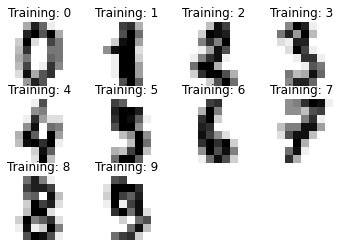

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Convertendo os dados em Dataframe

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [ ]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Dividindo os dados em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

### Verificando a forma dos dados

In [ ]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [ ]:
y_train.shape,y_test.shape

((1257,), (540,))

### Instânciando o algoritmo KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Predizendo novos pontos 

In [ ]:
resultado = knn.predict(X_test)
resultado

array([2, 4, 6, 3, 2, 3, 7, 4, 4, 0, 8, 3, 1, 9, 7, 1, 3, 6, 9, 6, 4, 8,
       9, 6, 0, 3, 2, 6, 2, 0, 7, 8, 5, 7, 3, 2, 9, 6, 5, 6, 7, 0, 8, 5,
       1, 3, 3, 0, 4, 1, 4, 2, 2, 3, 5, 2, 7, 1, 0, 0, 2, 9, 5, 1, 7, 6,
       7, 8, 9, 3, 5, 8, 7, 9, 5, 6, 5, 5, 2, 3, 1, 9, 5, 7, 9, 3, 5, 2,
       3, 9, 4, 2, 0, 0, 1, 8, 9, 1, 6, 4, 3, 6, 4, 9, 3, 4, 3, 9, 9, 6,
       3, 3, 0, 9, 3, 7, 1, 9, 7, 5, 7, 9, 0, 8, 6, 6, 4, 9, 1, 8, 4, 4,
       0, 1, 1, 1, 4, 3, 9, 3, 0, 7, 9, 5, 8, 1, 4, 1, 6, 9, 1, 3, 0, 1,
       2, 1, 1, 5, 0, 3, 7, 7, 0, 3, 0, 0, 7, 7, 0, 7, 7, 3, 9, 0, 8, 6,
       3, 5, 0, 0, 9, 8, 3, 3, 4, 7, 5, 8, 8, 2, 7, 9, 9, 9, 9, 5, 9, 9,
       0, 6, 2, 1, 9, 2, 7, 2, 0, 0, 6, 4, 9, 6, 8, 3, 1, 4, 7, 3, 5, 5,
       7, 5, 0, 0, 8, 9, 7, 6, 4, 5, 5, 7, 6, 9, 6, 6, 8, 2, 1, 6, 9, 5,
       4, 5, 9, 3, 8, 9, 5, 4, 4, 6, 4, 9, 0, 0, 1, 0, 8, 6, 8, 6, 7, 0,
       1, 4, 5, 2, 1, 3, 9, 3, 2, 3, 2, 6, 8, 4, 3, 3, 0, 6, 3, 5, 1, 5,
       8, 6, 1, 1, 6, 9, 6, 2, 0, 4, 0, 1, 1, 0, 4,

## Técnicas de Validação

### Metricas de classificação

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        43
           5       0.97      0.98      0.97        57
           6       1.00      1.00      1.00        65
           7       1.00      1.00      1.00        55
           8       0.98      0.98      0.98        43
           9       0.98      0.95      0.97        62

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### Matriz de Confusão

In [ ]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  50   0   0   0   0   0   0   0   0   0   50
1                   0  59   0   0   0   0   0   0   0   0   59
2                   0   0  49   0   0   0   0   0   0   0   49
3                   0   0   0  57   0   0   0   0   0   0   57
4                   0   0   0   0  43   0   0   0   0   0   43
5                   0   0   0   0   0  56   0   0   0   1   57
6                   0   0   0   0   0   0  65   0   0   0   65
7                   0   0   0   0   0   0   0  55   0   0   55
8                   0   1   0   0   0   0   0   0  42   0   43
9                   0   0   0   0   0   2   0   0   1  59   62
All                50  60  49  57  43  58  65  55  43  60  540


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe',axis=1),dataset['classe'], cv=5)
scores


array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

## Otimizando o Parametro K

### Importando o GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parametro 

In [ ]:
k_list = list(range(1,31))

In [ ]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciando o objeto GridSearch

In [ ]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Treinando o objeto

In [ ]:
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### Visualizando os valores de scores

In [ ]:
grid.cv_results_['mean_test_score']

array([0.96439338, 0.96717115, 0.96606469, 0.96384092, 0.96272826,
       0.95938564, 0.95994584, 0.95827608, 0.95661096, 0.95494274,
       0.9554983 , 0.95605231, 0.95549675, 0.95605076, 0.95438254,
       0.95438409, 0.95326679, 0.94937481, 0.95048437, 0.94992881,
       0.94881925, 0.94937635, 0.9482637 , 0.94882389, 0.94603838,
       0.94548282, 0.94380997, 0.94324977, 0.94102755, 0.94102445])

In [ ]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9671711544413494 de acurácia


### Visualização dos valores de K e acurácia

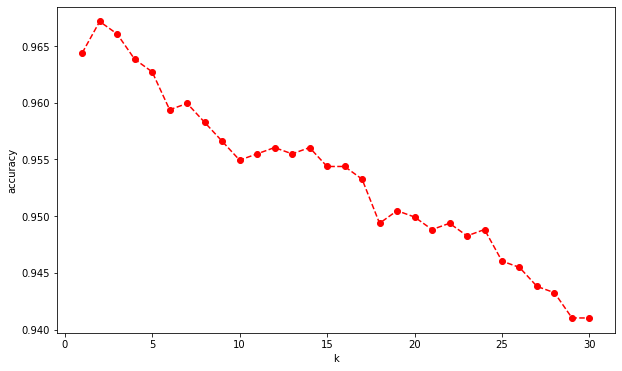

In [ ]:
scores=[]
for score in grid.cv_results_['mean_test_score']:
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()